# Ford Go Bike Usage in February 2019
## by Amr Mohamed Abuelfadl

## Investigation Overview
> The main goals of this presentation is to represent the usage patterns of Ford Go Bike in February. The presentation will cover the amount of time the rider spend in their time, as well as their prefered day and hour of the week of the week. In addition, we also want to take a deeper look at How does the average ride duration vary for each hour in weekdays. Finally, we want to discover how the average duration for rides change in each day between customer and subscriber.

## Dataset Overview
> The dataset contains 183412 and 16 columns. The dataset focused only on February 2019 and holds information about the duration of the ride in terms of the start datetime and endtime. As well as, info about the locations where the ride started or ended up, and finally, info regarding the rider in terms of date of birth, gender and user type. I have added also additional features such as day of the week and the hour of the start time, in addition to the age of the rider. The dataset was preprocessed before usage by removing the null values and duplicates, as well as, plotting visualizations to check for outliers as we want to focus more on the common cases to produce below accurate plots to find patterns and insights.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
# Removing null values
rows = df['member_birth_year'].isnull() | df['member_gender'].isnull()
indexes = df[rows].index
df.drop(indexes,inplace=True)
# Keep only the columns we are interested in
col = ['duration_sec', 'start_time', 'user_type', 'member_birth_year', 'member_gender']
df = df[col]
# Converting duration into minutes
df['duration_min'] = df['duration_sec'] // 60
df['duration_min'].head(10)
# Convert start_time column into datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
# Add new column day of the week, month, hour
df['day'] = df['start_time'].dt.day_name()
df['hour'] = pd.DatetimeIndex(df['start_time']).hour
# Add a new column Age of the rider
df['age'] = 2021 - df['member_birth_year']

## Which hour and day the user prefer to take their ride ?

> Most people take their rides on working days which is from Moday to Friday especially between 8am to 10am in the morning and between 16pm to 18pm in the afternoon and they spend almost 10 mins in their rides. The aforementioned results shows that users mainly take rides for their work as the distance between their work and home is not far, it takes only 10 mins almost. Therefore, the target audiences are employees.

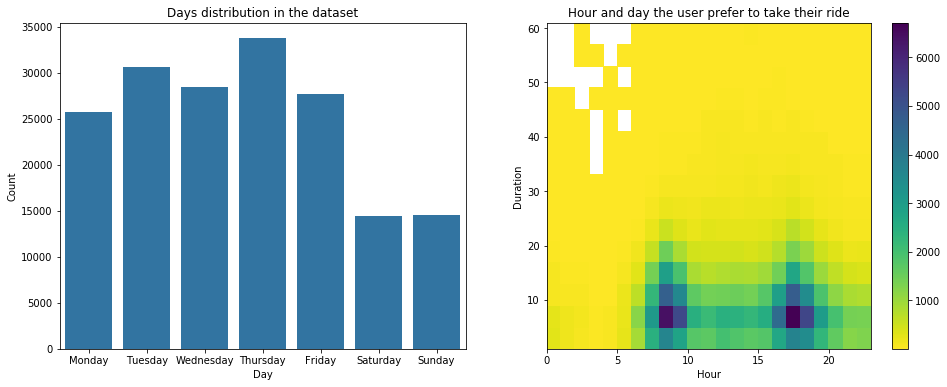

In [44]:
plt.figure(figsize=[16, 6]);
# Plotting days of the week for the rides
plt.subplot(1, 2, 1);
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_ordered = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['day'] = df['day'].astype(days_ordered)
color=sb.color_palette()[0]
sb.countplot(data=df, x='day', color=color)
plt.title('Days distribution in the dataset');
plt.xlabel('Day');
plt.ylabel('Count');
# Plotting days of the week for the rides
plt.subplot(1, 2, 2);
bins_x = np.arange(0, 24, 1)
bins_y = np.arange(1, 62, 4)
plt.title('Hour and day the user prefer to take their ride');
plt.hist2d(data = df, x = 'hour', y = 'duration_min', cmin=1, cmap='viridis_r', bins=[bins_x,bins_y]);
plt.colorbar()
plt.xlabel('Hour');
plt.ylabel('Duration');

## How the average duration for rides change in each day between customer and subscriber ? 

> Most of the users in the dataset are subscribers with 90.5%, however, the customers have the highest average trip duration in each day. Therefore, we can conclude that most of the subscribers use their rides to go work or back home as from Monday to Friday the average duration was almost the same 10 mins. On the other hand, customers have more variations in their average duration in each day and they spend more time in their rides during weekends. We have discovered here two different habits: subscribers take rides on their working days and customers take rides to spend more time in their weekends.

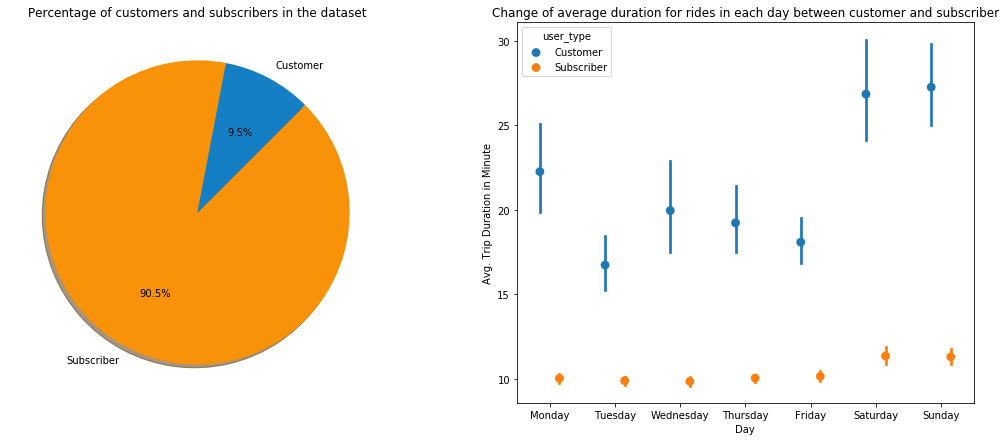

In [42]:
plt.figure(figsize=[18, 7]);

# Plotting distribution
plt.subplot(1, 2, 1);
count_values = df['user_type'].value_counts()
plt.title('Percentage of customers and subscribers in the dataset');
plt.pie(count_values, labels=count_values.index, startangle = 45, counterclock = False, autopct='%1.1f%%', shadow=True, colors=['#F89208', '#147FC4']);

# Plotting
plt.subplot(1, 2, 2);
sb.pointplot(data=df, x='day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.title('Change of average duration for rides in each day between customer and subscriber');
plt.xlabel('Day');
plt.ylabel('Avg. Trip Duration in Minute');

## What is the average user type age for each gender ?

> The average user type age for each gender is between 35 and 38. 

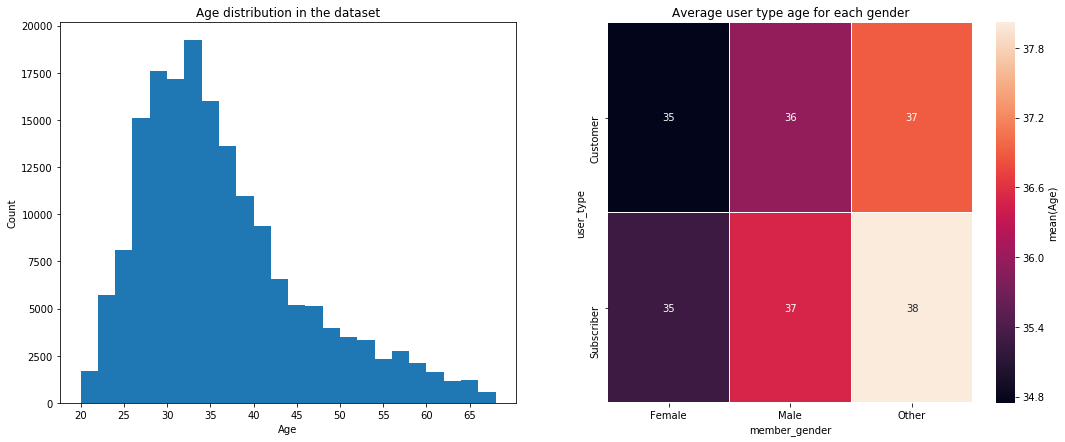

In [43]:
plt.figure(figsize=[18, 7]);

# Plotting
plt.subplot(1, 2, 1);
bins = np.arange(20, 70, 2)
plt.hist(df['age'], bins=bins);
ticks = np.arange(20, 70, 5)
plt.title('Age distribution in the dataset');
plt.xticks(ticks);
plt.xlabel('Age');
plt.ylabel('Count');

# Plotting
plt.subplot(1, 2, 2);
plt.title('Average user type age for each gender');
duration_means = df.groupby(['member_gender', 'user_type']).mean()['age']
duration_means = duration_means.reset_index(name = 'age_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'member_gender',values = 'age_avg')
sb.heatmap(duration_means, fmt = '.0f',cbar_kws = {'label' : 'mean(Age)'}, annot=True,linewidths=.3);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!